In [1]:
import pickle as pkl
import pk_plot_library as pplib
import numpy as np
import illustris_python as il
import matplotlib.pyplot as plt
import h5py as hp
import os

pplib.imports()

CROSSPATH = '/Users/cosinga/overleaf/higal_cross/figures/'
SAVEPATH = '/Users/cosinga/code/hcolor/fig_md_analysis/'
WEBPATH = '/Users/cosinga/code/calvinosinga.github.io/papers/higal_cross/images/'

def fill_mean(ax, data, kwargs):
    x = data[0]
    y = np.mean(np.array([data[1], data[2]]), axis = 0)
    kwargs['alpha'] = 1
    ax.plot(x, y, **kwargs)
    return

In [2]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/5-18_pkdatasort.pkl', 'rb'))
ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs((-1, -1), frameon = False, fontsize = 12, loc = 'lower left')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.axisLabelArgs('both', {'fontsize':16})
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 14, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 14, ha = 'center', va = 'top')
ds.displayAs('snapshot', [99, 67, 50], ['z = 0.0', 'z = 0.5', 'z = 1.0'])
ds.setXLabel(pplib.wnum())
ds.setYLabel(pplib.pklab('HI', 'gal'))
ds.setOrder('snapshot', [99, 67, 50])
ds.displayAs('censat', ['centrals_satellites', 'satellites_centrals', 'satellites', 'centrals', 'both'], ['HI (cen) x Gal (sat)', 'Gal (cen) x HI (sat)', 'Satellites', 'Centrals', 'All Terms'])



In [4]:
snapshots = [99, 67, 50]
def_attrs = {'censat':'centrals_satellites', 'path':'censat',
            'fieldname':'galaxy', 'space':'real'}
if not os.path.exists("../cenxsat_reform.hdf5"):
    print("REFORMATTING CENXSAT FILES")
    w = hp.File("../cenxsat_reform.hdf5", 'w')
    for ss in snapshots:
        def_attrs['snapshot'] = ss
        f = hp.File("../cenxsat_%d.hdf5"%ss, 'r')
        keys = list(f.keys())

        for k in keys:
            newk = k.split('_')[0] + '_%d'%ss
            print(newk)
            w.create_dataset(newk, data = f[k][:])
            w[newk].attrs.update(def_attrs)

            w[newk].attrs['color'] = k.split('_')[0]
ds.loadHdf5("../cenxsat_reform.hdf5")

# Decomposing HI auto power

The row values for color: ['blue', 'red', 'resolved', 'no key found']
The column values for censat: ['centrals', 'satellites', 'centrals_satellites']


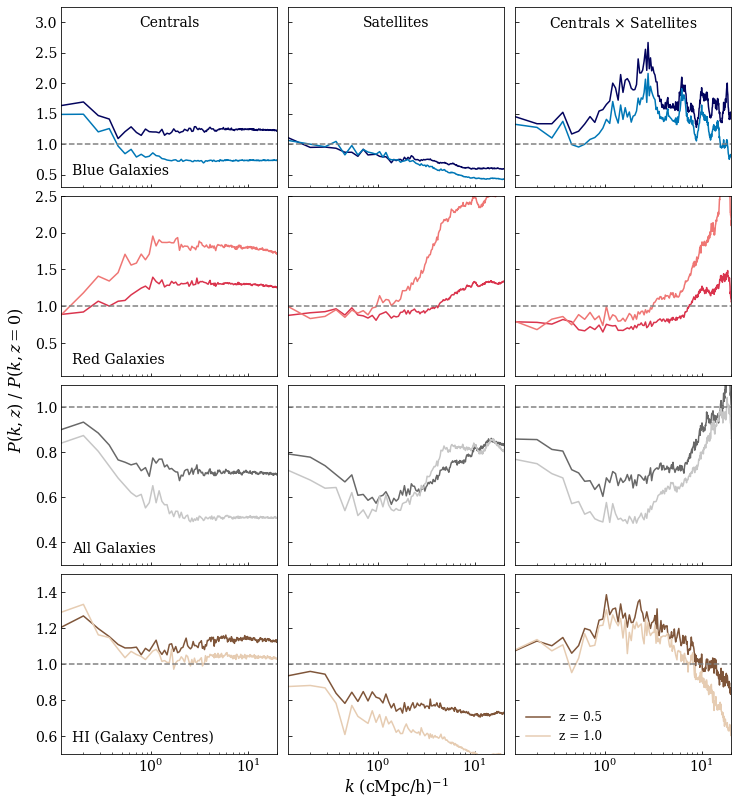

In [13]:
numer = [99, 67, 50]
denom = 99
numer.remove(denom)
numer.sort()
ip = {'fieldname':['hisubhalo', 'galaxy'], 'snapshot':[99, 67, 50],
     'censat':['centrals', 'satellites', 'centrals_satellites'],
     'path':'censat', 'space':'real', 'color':['blue', 'red', 'resolved', 'no key found']}
fg = ds.figrid('snapshot', 'color', 'censat', ip)

fg.setPanelsize(3, 2.5)

fg.gspecArgs(wspace = 0.05, hspace = 0.05)
fg.setCmap(['#e6ccb2', '#7f5539'], numer, {'fieldname':'hisubhalo'})
blue_colors = ['#0077b6', '#03045e']
red_colors = ['#ef7674', '#da344d']
fg.setCmap(red_colors, numer, {'color':'red'})
fg.setCmap(blue_colors, numer, {'color':'blue'})
fg.setCmap('Greys', numer, {'color':'resolved'})
fg.autoNorm({'snapshot':denom}, ['model'])
fg.autoFill()
fg.setDefaultTicksParams()
fg.rowLabels(['Blue Galaxies', 'Red Galaxies', 'All Galaxies', 'HI (Galaxy Centres)'])
fg.colLabels(['Centrals', 'Satellites', 'Centrals $\\times$ Satellites'])
fg.setFunc({'figrid_process':'fill', 'snapshot':numer}, fill_mean)
fg.axisArgs(yscale = 'linear')

fg.axisArgs(slc = 'no key found', ylim = (0.5, 1.5))
fg.axisArgs(slc = 'red', ylim = (0.05, 2.5))
fg.axisArgs(slc = 'blue', ylim = (0.3, 3.25))
fg.axisArgs(slc = 'resolved', ylim = (0.3, 1.1))
fg.setYLabel("$P (k, z)$ / $P (k, z = 0)$")
fg.plotOnes()

fg.plot()

# blueax = fg.axes[0, 2]
# redax = fg.axes[1, 2]
# f = hp.File(SAVEPATH + 'cenxsat_%d.hdf5'%denom, 'r')
# blue_denom = f['blue_pk'][1]
# red_denom = f['red_pk'][1]
# for i,ss in enumerate(numer):
#     f = hp.File(SAVEPATH + 'cenxsat_%d.hdf5'%ss, 'r')
#     data = f['red_pk']
#     redax.plot(data[0], data[1]/red_denom, color = red_colors[i])
#     data = f['blue_pk']
#     blueax.plot(data[0], data[1]/blue_denom, color = blue_colors[i])

fg.save(CROSSPATH + 'auto_censat_zevo_with_resolved.pdf', dpi = 150)

The row values for color: ['blue', 'red', 'resolved']
The column values for censat: ['centrals', 'satellites', 'centrals_satellites']


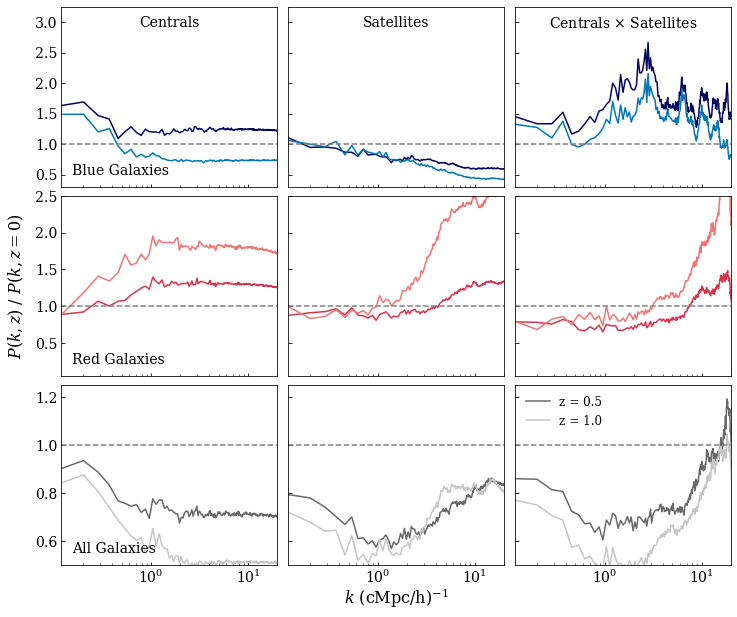

In [12]:
numer = [99, 67, 50]
denom = 99
numer.remove(denom)
numer.sort()
ip = {'fieldname':['galaxy'], 'snapshot':[99, 67, 50],
     'censat':['centrals', 'satellites', 'centrals_satellites'],
     'path':'censat', 'space':'real', 'color':['blue', 'red', 'resolved']}
fg = ds.figrid('snapshot', 'color', 'censat', ip)

fg.setPanelsize(3, 2.5)

fg.gspecArgs(wspace = 0.05, hspace = 0.05)
fg.setCmap(['#e6ccb2', '#7f5539'], numer, {'fieldname':'hisubhalo'})
blue_colors = ['#0077b6', '#03045e']
red_colors = ['#ef7674', '#da344d']
fg.setCmap(red_colors, numer, {'color':'red'})
fg.setCmap(blue_colors, numer, {'color':'blue'})
fg.setCmap('Greys', numer, {'color':'resolved'})

fg.autoNorm({'snapshot':denom}, ['model'])
fg.autoFill()
fg.setDefaultTicksParams()
fg.rowLabels(['Blue Galaxies', 'Red Galaxies', 'All Galaxies'])
fg.colLabels(['Centrals', 'Satellites', 'Centrals $\\times$ Satellites'])
fg.setFunc({'figrid_process':'fill', 'snapshot':numer}, fill_mean)
fg.axisArgs(yscale = 'linear')

fg.axisArgs(slc = 'no key found', ylim = (0.5, 1.5))
fg.axisArgs(slc = 'red', ylim = (0.05, 2.5))
fg.axisArgs(slc = 'blue', ylim = (0.3, 3.25))
fg.setYLabel("$P (k, z)$ / $P (k, z = 0)$")
fg.legendArgs(loc = 'upper left')
fg.axisArgs(slc = 'resolved', yscale = 'linear', ylim = (0.5, 1.25))

fg.plotOnes()

fg.plot()

The row values for censat: ['satellites_centrals', 'centrals_satellites']
The column values for : ['no key found']


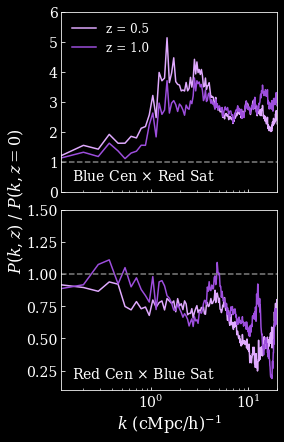

In [5]:
ip = {'path':'censat', 'fieldname':'galaxy', 'is_auto':False, 'color':['red_blue'],
     'censat':['satellites_centrals', 'centrals_satellites'], 'snapshot':[50, 67, 99]}
fg = ds.figrid('snapshot', 'censat', '', ip)
gspec_args = {'hspace':0.1}
fg.gspecArgs(gspec_args)
fg.autoNorm({'snapshot':denom})
purp_cols = ['#9d4edd', '#e0aaff']
fg.setYLabel("$P (k, z)$ / $P (k, z = 0)$")
fg.setPanelsize(3, 2.5)

fg.rowLabels(['Blue Cen $\\times$ Red Sat', 'Red Cen $\\times$ Blue Sat'])
fg.setCmap(purp_cols, numer)
fg.plotOnes()
fg.setDefaultTicksParams()
fg.axisArgs(yscale = 'linear')
fg.axisArgs(ylim = (0, 6), slc = (0, 0))
fg.axisArgs(ylim = (0.1, 1.5), slc = (1, 0))
fg.legendArgs(slc = (0, 0), loc = 'upper left')
pplib.darkmode(fg)
fg.plot()


The row values for censat: ['satellites_centrals', 'centrals_satellites']
The column values for : ['no key found']


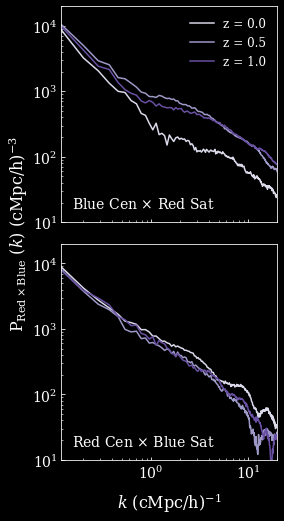

In [8]:
ip = {'path':'censat', 'fieldname':'galaxy', 'is_auto':False, 'color':['red_blue'],
     'censat':['satellites_centrals', 'centrals_satellites'], 'snapshot':[50, 67, 99]}
fg = ds.figrid('snapshot', 'censat', '', ip)
gspec_args = {'hspace':0.1}
fg.gspecArgs(gspec_args)
purp_cols = ['#9d4edd','#c77dff', '#e0aaff']
fg.setYLabel(pplib.pklab("Red", "Blue"))

fg.rowLabels(['Blue Cen $\\times$ Red Sat', 'Red Cen $\\times$ Blue Sat'])
fg.setCmap('Purples', [99, 67, 50])
fg.plotOnes()
fg.axisArgs(ylim = (10, 2e4))
fg.setDefaultTicksParams()
fg.legendArgs(slc = (0, 0), loc = 'upper right')
pplib.darkmode(fg)
fg.plot()
fg.save(WEBPATH + "redxblue_cenxsat_zevo.png", dpi = 200)

The row values for censat: ['centrals', 'satellites', 'centrals_satellites']
The column values for : ['no key found']


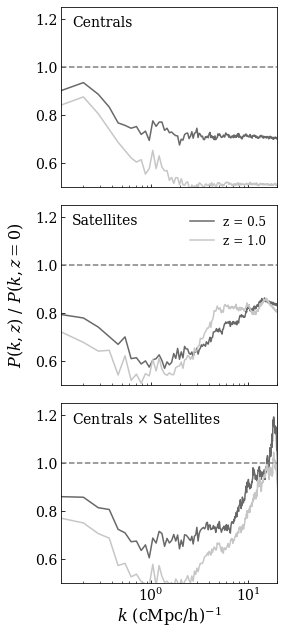

In [35]:
ip = {'path':'censat', 'fieldname':'galaxy', 'color':['resolved'],
     'censat':['centrals', 'satellites', 'centrals_satellites'], 'snapshot':[50, 67, 99]}
fg = ds.figrid('snapshot', 'censat', '', ip)
fg.gspecArgs(gspec_args)
fg.autoNorm({'snapshot':denom})
fg.setYLabel("$P (k, z)$ / $P (k, z = 0)$")
fg.setPanelsize(3, 2.5)
fg.setCmap('Greys', numer)
fg.rowLabels(['Centrals', 'Satellites', 'Centrals $\\times$ Satellites'], pos = (0.05, 0.95))
fg.rowLabelArgs(va = 'top')
fg.setDefaultTicksParams()
fg.axisArgs(yscale = 'linear', ylim = (0.5, 1.25))
fg.legendArgs(slc = (1, 0), loc = 'upper right')
pplib.darkmode(fg)
fg.plotOnes()

fg.plot()

The row values for : ['no key found']
The column values for censat: ['centrals', 'satellites', 'centrals_satellites']


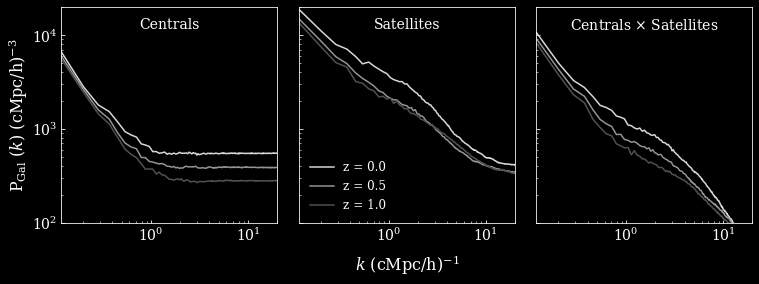

In [14]:
ip = {'path':'censat', 'fieldname':'galaxy', 'color':['resolved'],
     'censat':['centrals', 'satellites', 'centrals_satellites'], 'snapshot':[50, 67, 99]}
fg = ds.figrid('snapshot', '', 'censat', ip)
gspec_args = {'wspace':0.1}
fg.gspecArgs(gspec_args)
purp_cols = ['#9d4edd','#c77dff', '#e0aaff']
fg.setYLabel(pplib.pklab("Gal"))

fg.colLabels(['Centrals', 'Satellites', 'Centrals $\\times$ Satellites'])
fg.setCmap('Greys', [99, 67, 50])
fg.plotOnes()
fg.axisArgs(ylim = (1e2, 2e4))
fg.setDefaultTicksParams()
fg.legendArgs(slc = (0, 1), loc = 'lower left')
pplib.darkmode(fg)
fg.plot()